---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

 

 
 #            BINARY CLASSIFICATION USING LOGISTIC REGRESSION
 
 #####  -- Sameer K
 ###### Dec ' 01 2018
 
  
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 
 
 

##  Introduction to Logistic Regression
------------------------------------------------------------------------------------

### Overview
------------------------------------------------------------------------------------
Logistic regression is generally used where the dependent variable is Binary or Dichotomous. That means the dependent variable can take only two possible values such as “Yes or No”, “Default or No Default”, “Living or Dead”, “Responder or Non Responder”, “Yes or No” etc.  Independent factors or variables can be categorical or numerical variables.  


Please note that even though logistic (logit) regression is frequently used for binary variables (2 classes), it can be used for categorical dependent variables with more than 2 classes. In this case it’s called Multinomial Logistic Regression.  


Here we will focus on Logistic Regression with binary dependent variables as it is most commonly used. 

### Applications of Logistic Regression- 
------------------------------------------------------------------------------------
Logistic regression is used for prediction of output which is binary, as stated above. For example, if a credit card company is going to build a model to decide whether to issue a credit card to a customer or not, it will model for whether the customer is going to “Default” or “Not Default” on this credit card.  This is called “Default Propensity Modeling” in banking lingo. 
Similarly an ecommerce company that is sending out costly advertisement / promotional offer mails to customers, will like to know whether a particular customer is likely to respond to the offer or not. In Other words, whether a customer will be “Responder” or “Non Responder”. This is called “Propensity to Respond Modeling”

Using insights generated from the logistic regression output, companies may optimize their business strategies to achieve their business goals such as minimize expenses or losses, maximize return on investment (ROI) in marketing campaigns etc. 
Underlying Algorithm and Assumptions

The underlying algorithm of Maximum Likelihood Estimation (MLE) determines the regression coefficient for the model that accurately predicts the probability of the binary dependent variable. The algorithm stops when the convergence criterion is met or maximum number of iterations are reached. Since the probability of any event lies between 0 and 1 (or 0% to 100%), when we plot the probability of dependent variable by independent factors, it will demonstrate an ‘S’ shape curve.  


Let’s take an example- here we are predicting the probability of a given candidate to get admission in a school of his or her choice by the score candidates receives in the admission test. Since the dependent variable is binary/dichotomous- “Admission “or “No Admission”, we can use a logistic regression model to predict the probability of getting the “Admission”. Let’s first plot the data and analyse the shape to confirm that this is following an ‘S’ shape. 


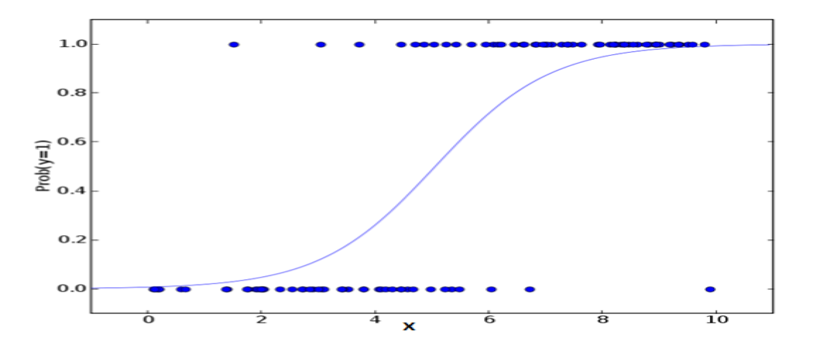

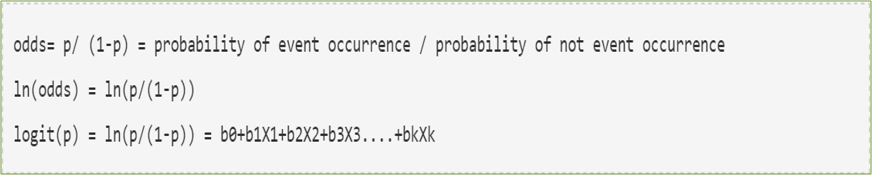

--------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:

### Import libraries 

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import SMOTE
sns.set()
%matplotlib inline 


In [2]:

# Set working Directory

path = 'C:\\Users\\Sameer\\Desktop\\GREYATOM'
os.chdir(path)


In [3]:
# Check for files 
# os.listdir()

In [4]:
data = pd.read_csv('banking.csv')

The Data
The data is related with direct marketing campaigns (phone calls) of a banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. 

It includes 41188 records and 21 fields.

## Data Dictionary 
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

1. age 
------------------------------------------------------------------------------------
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
------------------------------------------------------------------------------------
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
------------------------------------------------------------------------------------
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
------------------------------------------------------------------------------------
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
------------------------------------------------------------------------------------
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
------------------------------------------------------------------------------------
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
------------------------------------------------------------------------------------
8. contact: contact communication type (categorical: “cellular”, “telephone”)
------------------------------------------------------------------------------------
9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
------------------------------------------------------------------------------------
10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
------------------------------------------------------------------------------------
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
------------------------------------------------------------------------------------

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
------------------------------------------------------------------------------------
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
------------------------------------------------------------------------------------
14. previous: number of contacts performed before this campaign and for this client (numeric)
------------------------------------------------------------------------------------
15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
------------------------------------------------------------------------------------
16. emp.var.rate: employment variation rate — (numeric)
------------------------------------------------------------------------------------
17. cons.price.idx: consumer price index — (numeric)
------------------------------------------------------------------------------------
18. cons.conf.idx: consumer confidence index — (numeric)
------------------------------------------------------------------------------------
19. euribor3m: euribor 3 month rate — (numeric)
------------------------------------------------------------------------------------
20. nr.employed: number of employees — (numeric)
------------------------------------------------------------------------------------

### Predict variable (desired target):
------------------------------------------------------------------------------------
y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [7]:
## Check For any missing values in the data set
pd.DataFrame(data.isnull().sum())

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [8]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [9]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [10]:
# data Exploration
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

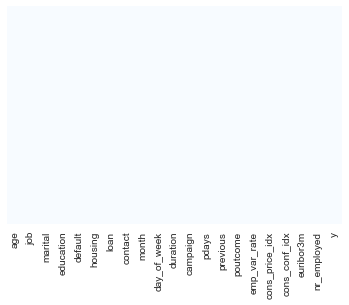

In [11]:
# Graphical Representation of Missing values 

sns.heatmap(data.isnull() , yticklabels=False , cbar=False,cmap="Blues")

In [12]:
# Unique Values of eductation
data['education'].unique()


array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [13]:
# Remove the na from the data set 
data = data.dropna()

In [14]:
# dimention of data frame 
print(data.shape)

(41188, 21)


In [15]:
# Column names 
print(list(data.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [16]:
pd.DataFrame(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

""


In [18]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


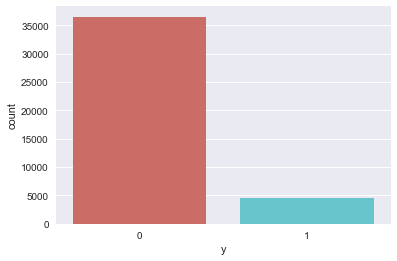

In [19]:
# Data Balance

sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [20]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [21]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [ ]:
sns.pairplot(data,hue="y")
plt.show()

Our classes are imbalanced, 
------------------------------------------------------------------------------------------------------------------------------------------------------------------------
and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, Let's do some more exploration.

In [22]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't. The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale. Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [23]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [24]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


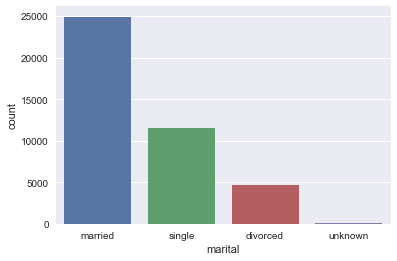

In [25]:
# Customer marital status distribution
sns.countplot(x="marital", data=data)
plt.show()

In [26]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


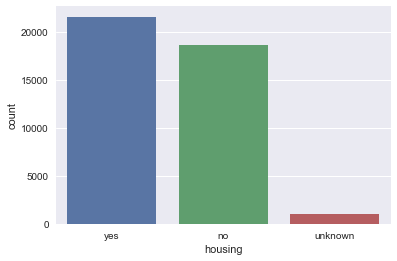

In [27]:
# Barplot for housing loan

sns.countplot(x="housing", data=data)
plt.show()

Text(0,0.5,'Frequency of Purchase')

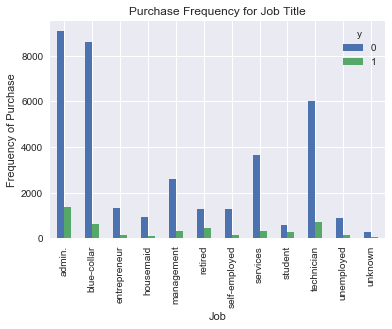

In [28]:
# The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Text(0,0.5,'Proportion of Customers')

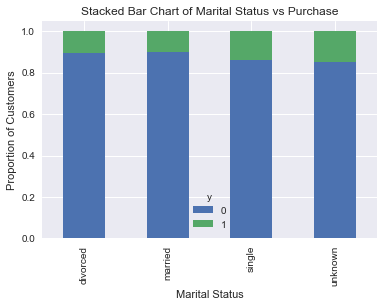

In [29]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

Text(0,0.5,'Proportion of Customers')

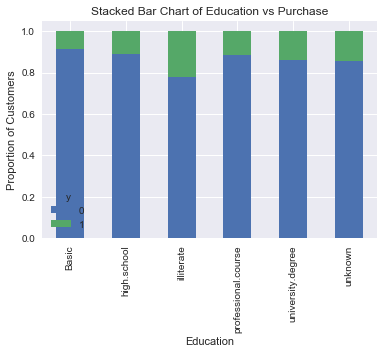

In [30]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Education seems a good predictor of the outcome variable.

Text(0,0.5,'Frequency of Purchase')

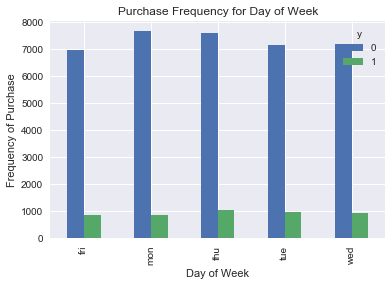

In [31]:
# Day of week may not be a good predictor of the outcome.

pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')


Text(0.5,0,'Month')

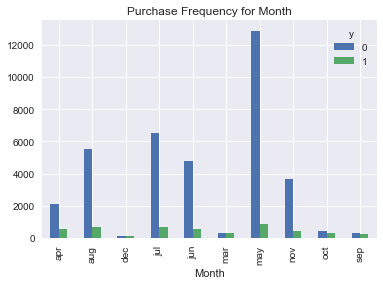

In [32]:
# Month might be a good predictor of the outcome variable.

pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
##plt.ylabel('Frequency of Purchase')

Text(0,0.5,'Frequency')

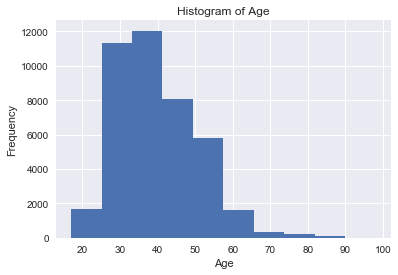

In [33]:
 ## Most customers of the bank in this dataset are in the age range of 30-40.
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency of Purchase')

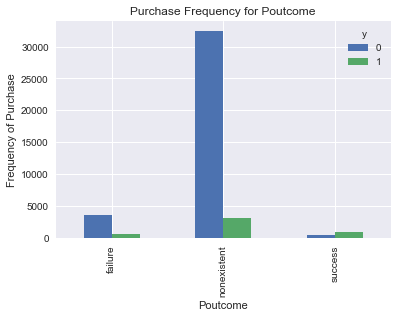

In [34]:
# Poutcome seems to be a good predictor of the outcome variable
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

Create Dummy Variables 

## Data Preprocessing
#### Create dummy variables, that is variables with only two values, zero and one.
##### In logistic regression models, encoding all of the independent variables as dummy variables allows easy interpretation and calculation of the odds ratios, and increases the stability and significance of the coefficients.

In [35]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

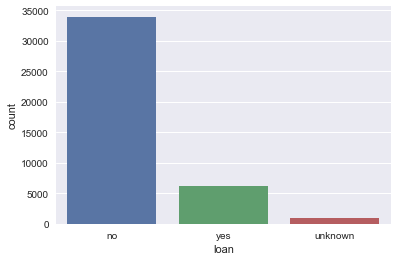

In [36]:
# Barplot for personal loan
sns.countplot(x="loan", data=data)
plt.show()

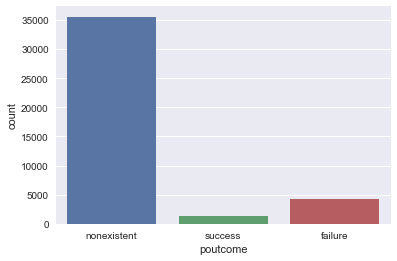

In [37]:
# Barplot for previous marketing campaign outcome
sns.countplot(x="poutcome", data=data)
plt.show()

In [67]:
# Over-sampling using SMOTE
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

In [72]:
# from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X , os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])




# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

c:\users\sameer\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [73]:
os_data_X.shape,os_data_y.shape

((51134, 61), (51134, 1))

In [74]:
## Recursive Feature Elimination
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

In [75]:

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False  True False False  True
 False  True False False  True  True False  True False False False False
 False  True False False  True False False False  True  True False False
 False False False False False  True  True  True False False False False
  True  True  True  True  True False False False False False  True False
  True]
[37 35 24 38  7 10 20 33  1 31  5  1  4  1  2 30  1  1 27  1  3  8 17 18 13
  1 11 15  1 14 19 16  1  1 42 25 39 34 29 36 32  1  1  1  6 23 40 22  1  1
  1  1  1 28  9 26 41 21  1 12  1]


The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [85]:

cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 

X=os_data_X[cols]
y=os_data_y['y']

X_test = X_test[cols]


In [86]:
logreg = LogisticRegression(solver='liblinear')

In [87]:
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
X.shape

(51134, 20)

In [89]:

y_pred = logreg.predict(X_test)

In [90]:
X_test.shape

(12357, 20)

In [91]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8892 2089]
 [ 446  930]]


In [92]:
# Classification Report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88     10981
           1       0.31      0.68      0.42      1376

   micro avg       0.79      0.79      0.79     12357
   macro avg       0.63      0.74      0.65     12357
weighted avg       0.88      0.79      0.82     12357



Interpretation:
Of the entire test set, 74% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 74% of the customer's preferred term deposit were promoted.

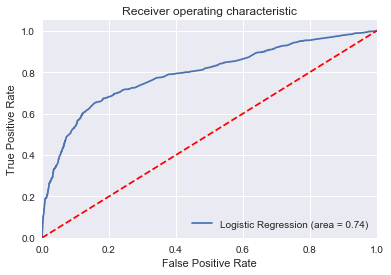

In [93]:
## ROC CURVE

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Websites to refer
-------------------------------------------------------------------------------------------------------------------------------------------------------------


https://en.wikipedia.org/wiki/Sensitivity_and_specificity

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

https://en.wikipedia.org/wiki/Precision_and_recall#Definition_(classification_context)





    

#  

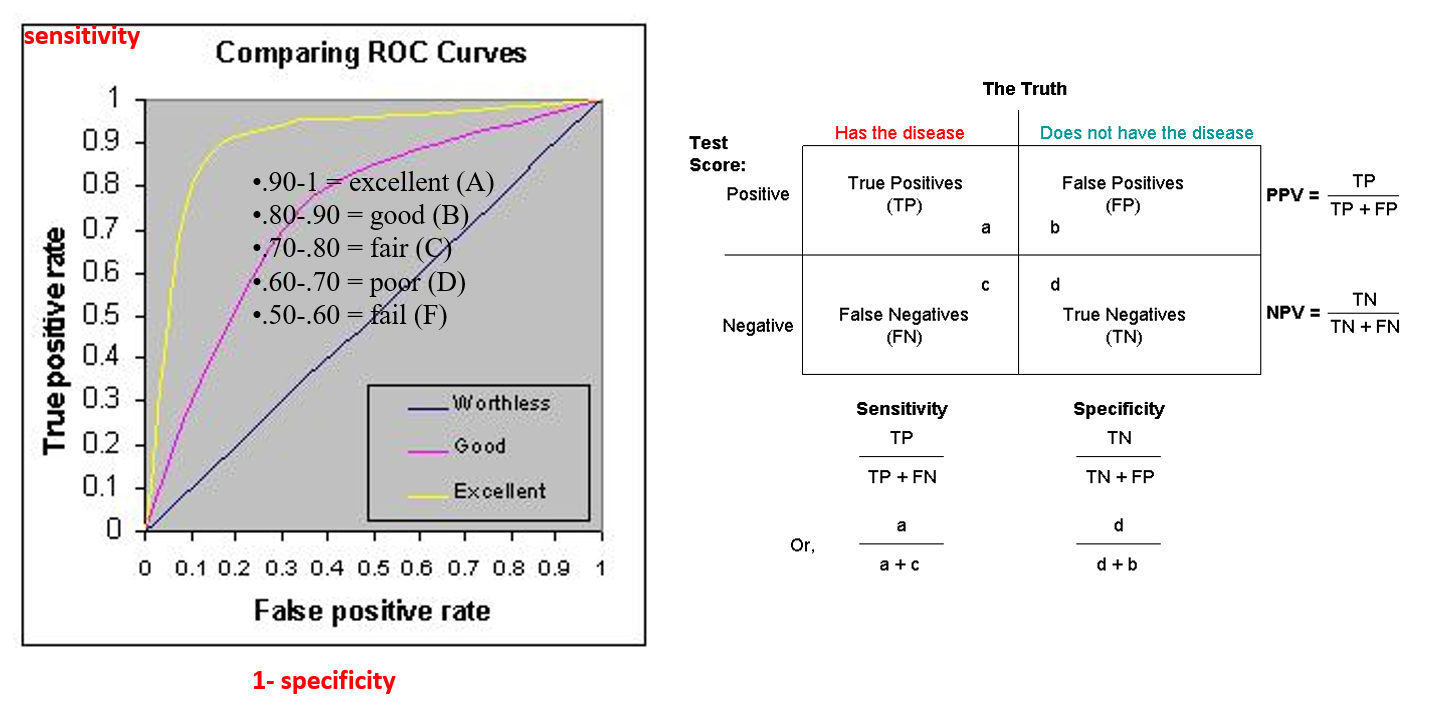

In [94]:
from IPython.core.display  import Image
Image(filename=('Img/SENSITIVITY_SPECIFICITY.PNG'))

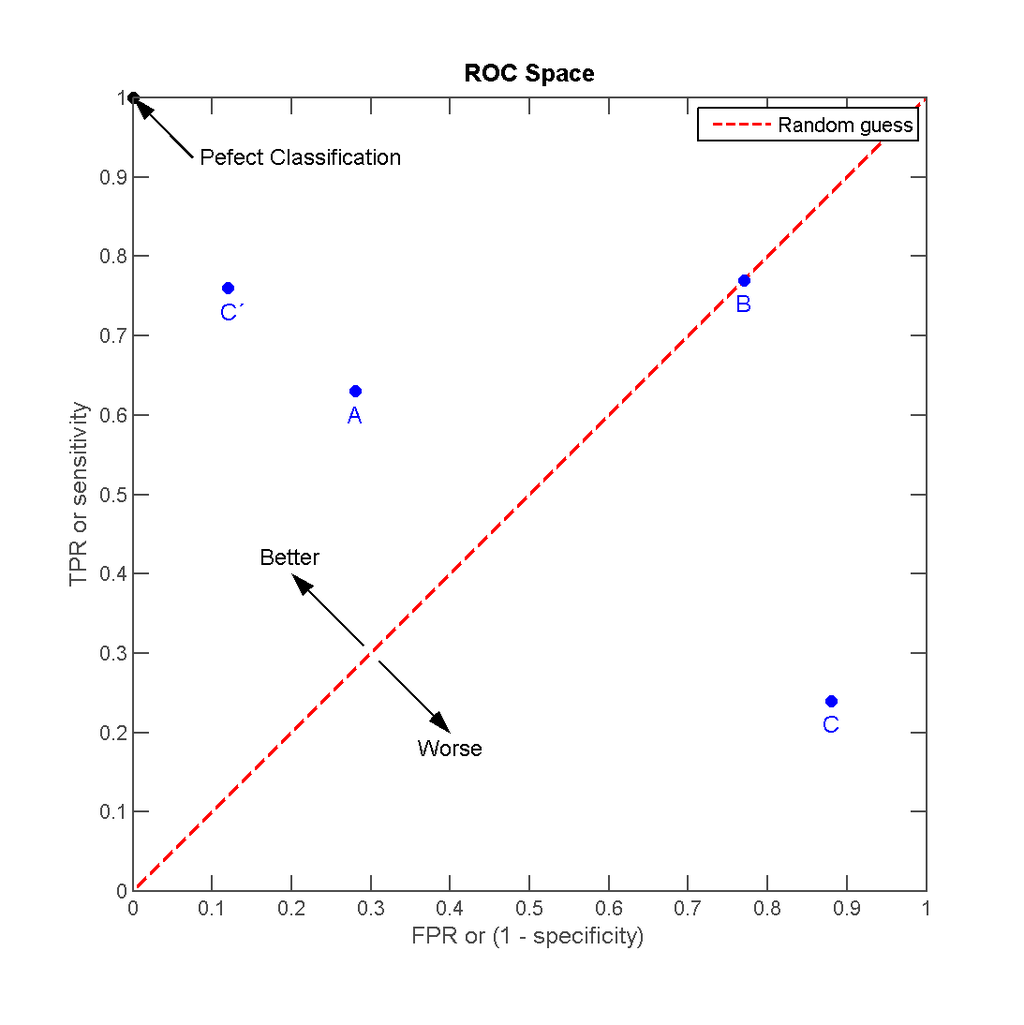

In [97]:
from IPython.core.display  import Image
Image(filename=('Img/1024px-ROC_space-2.png') , width = 600 , height =600 )

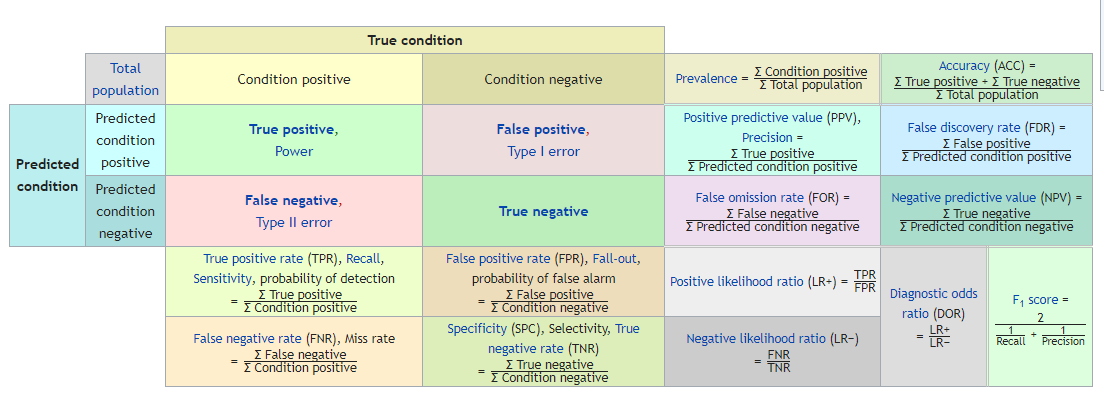

In [98]:
from IPython.core.display  import Image
Image(filename=('Img/TPR_FPR.PNG'))